# <span style="color:red"> ***** </span><span style="color:blue"> Overview of Wav2Vec2 </span> <span style="color:green"> ***** </span>

Recent advancements in automatic speech recognition (ASR) and automatic speech translation (AST) have focused on leveraging large language models (LLMs) and innovative prompting techniques to enhance the performance of speech processing systems. This discussion synthesizes key concepts related to Wav2Vec2, character duration in speech transcripts, AST transcripts, and the integration of language models for effective speech extraction.

Wav2Vec2 and ASR

Wav2Vec2 is a self-supervised learning model developed by Facebook AI Research that processes raw audio waveforms for ASR tasks. It captures rich audio representations by training on large amounts of unlabeled data, making it highly effective for transcribing speech into text. The model operates by learning to predict masked portions of audio input, which allows it to understand phonetic and linguistic features without requiring extensive labeled datasets.


Overview
This design document describes the extract_features function, which utilizes the Wav2Vec2 model from Hugging Face's Transformers library to extract audio features from input audio files. The function is designed to load audio data, preprocess it (including resampling if necessary), and output a feature vector that can be used for various downstream tasks such as speech recognition, speaker identification, or emotion detection.

Purpose
The primary purpose of this function is to provide an efficient and effective means of extracting high-dimensional feature representations from raw audio waveforms using a self-supervised learning model. These features can be utilized in machine learning models for tasks involving speech or audio analysis.

Components

Dependencies:

Libraries:
torch: For tensor operations and model inference.
torchaudio: For loading and processing audio files.
numpy: For numerical operations on arrays.
transformers: For accessing the Wav2Vec2 model and processor.

Global Variables:
Wav2Vec2Processor: A processor that prepares audio input for the Wav2Vec2 model.
Wav2Vec2ForCTC: The pre-trained Wav2Vec2 model used for feature extraction.

Functionality
Function: extract_features(audio_path)

Input:
audio_path (str): The file path to the audio file that needs to be processed.

Output:
A NumPy array representing the mean of the last hidden state from the Wav2Vec2 model, which serves as the feature vector extracted from the audio input.

# <span style="color:red"> ***** </span><span style="color:blue"> Project Data File Folder</span> <span style="color:green"> ***** </span>

In [1]:
import sys, os
parent_dir = os.path.dirname(os.path.realpath('/Users/akpy27/Downloads/Untitled'))

In [2]:
# To get one directory up from the current file
project_dir = os.path.abspath(os.path.join(parent_dir, "./Untitled/"))

sys.path.insert(0,project_dir)

print ('Parent Directory Path:', parent_dir)
print ('Project Path:', project_dir)

Parent Directory Path: /Users/akpy27/Downloads
Project Path: /Users/akpy27/Downloads/Untitled


In [3]:
!pip3 install transformers

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import librosa
import torchaudio
import numpy as np
from glob import glob
from tqdm import tqdm
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# <span style="color:red"> ***** </span><span style="color:blue"> Feature Extraction</span> <span style="color:green"> ***** </span>

In [ ]:
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor



# Load pre-trained Wav2Vec2 model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Function to extract features using Wav2Vec2
def extract_features(audio_path):
    waveform, sample_rate = torchaudio.load(audio_path)
   
    #waveform = audio.numpy().reshape(-1)
    
    if sample_rate != 16000:
        waveform = resampled_waveform = torchaudio.functional.resample(waveform, sample_rate, 16000)
    
    input_values = processor(waveform.squeeze().numpy(), return_tensors="pt", sampling_rate=16000).input_values
    
    with torch.no_grad():
        outputs = model(input_values, output_hidden_states=True)
    
    # Extract the last hidden state
    last_hidden_state = outputs.hidden_states[-1].squeeze().numpy()
    
    # Compute mean of the last hidden state as a feature vector
    feature_vector = np.mean(last_hidden_state, axis=0)
    
    return feature_vector

def get_label(file_name):
  '''
  Function to retrieve output labels from filenames
  '''
  if 'ROC' in file_name:
    label=0
  elif 'LES' in file_name:
    label=1
  elif 'DCB' in file_name:
    label=2
  elif 'PRV' in file_name:
    label=3
  elif 'VLD' in file_name:
    label=4
  elif 'DTA' in file_name:
    label=5
  else:
    raise ValueError('invalid file name')
  return label

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# <span style="color:red"> ***** </span><span style="color:blue"> Train and Test Data Preparation</span> <span style="color:green"> ***** </span>

In [6]:
#First we obtain the list of all files in the train directory
train_files = glob(project_dir + "/project_data/train/*.wav")

#Let's sort it so that we're all using the same file list order
#and you can continue processing the features from a given file if it stops
#partway through running
train_files.sort()

train_feat=[]
train_label=[]

for wav in tqdm(train_files):

  train_feat.append(extract_features(wav))
  train_label.append(get_label(wav))

100%|██████████| 8980/8980 [14:51<00:00, 10.07it/s]


In [7]:
#Now we obtain the list of all files in the test_clean directory
test_clean_files = glob(project_dir + '/project_data/test_clean/*.wav')

#Similar to above, we sort the files
test_clean_files.sort()

test_clean_feat=[]
test_clean_label=[]

for wav in tqdm(test_clean_files):

  test_clean_feat.append(extract_features(wav))
  test_clean_label.append(get_label(wav))

100%|██████████| 2533/2533 [04:08<00:00, 10.17it/s]


In [9]:
#Finally we obtain the list of all files in the test_noisy directory
test_noisy_files = glob(project_dir + '/project_data/test_noisy/*.wav')

#Similar to above, we sort the files
test_noisy_files.sort()

test_noisy_feat=[]
test_noisy_label=[]

for wav in tqdm(test_noisy_files):

  test_noisy_feat.append(extract_features(wav))
  test_noisy_label.append(get_label(wav))

100%|██████████| 3238/3238 [05:20<00:00, 10.11it/s]


# <span style="color:red"> ***** </span><span style="color:blue"> Model Training and Predictions</span> <span style="color:green"> ***** </span>

In [10]:
import xgboost
import numpy as np
import shap
import pandas as pd

#Format input data

#Edit this variable to create a list that contains your feature names
feat_names=['wave2vec2_' +str(n) for n in range(len(train_feat[0]))]

train_feat_df = pd.DataFrame(data=np.stack(train_feat), columns=feat_names)
y_train=np.stack(train_label)


test_clean_feat_df = pd.DataFrame(data=np.stack(test_clean_feat), columns=feat_names)
y_test_clean=np.stack(test_clean_label)


test_noisy_feat_df = pd.DataFrame(data=np.stack(test_noisy_feat), columns=feat_names)
y_test_noisy=np.stack(test_noisy_label)


#you could just pass in the matrix of features to xgboost
#but it looks prettier in the shap explainer if you format it
#as a dataframe.


model = xgboost.XGBClassifier()
model.fit(train_feat_df,y_train)

print("Train Clean Acc =", np.sum(y_train==model.predict(train_feat_df))/len(y_train))

print("Test Clean Acc =", np.sum(y_test_clean==model.predict(test_clean_feat_df))/len(y_test_clean))

print("Test Noisy Acc =", np.sum(y_test_noisy==model.predict(test_noisy_feat_df))/len(y_test_noisy))


Train Clean Acc = 1.0
Test Clean Acc = 0.25700750098697195
Test Noisy Acc = 0.26930203829524396


# <span style="color:red"> ***** </span><span style="color:blue"> Hyperparameter Tuning </span> <span style="color:green"> ***** </span>

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(train_feat_df,y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1}
Best score:  0.3477728285077951


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(train_feat_df, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.08185692683374493, 'max_depth': 8, 'n_estimators': 189, 'subsample': 0.7981613397364926}
Best score:  0.3507795100222717


In [ ]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials

# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

# Define the objective function to minimize
def objective(params):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(train_feat_df, y_train)
    y_pred_clean = xgb_model.predict(test_clean_feat_df)
    score = accuracy_score(y_test_clean, y_pred_clean)
    return {'loss': -score, 'status': STATUS_OK}


# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 100/100 [25:29<00:00, 15.29s/trial, best loss: -0.29451243584682196]
Best set of hyperparameters:  {'learning_rate': 0.03319370232297988, 'max_depth': 0, 'subsample': 0.6346031331742502}


# <span style="color:red"> ***** </span><span style="color:blue"> Interpreting Results and Explainability</span> <span style="color:green"> ***** </span>

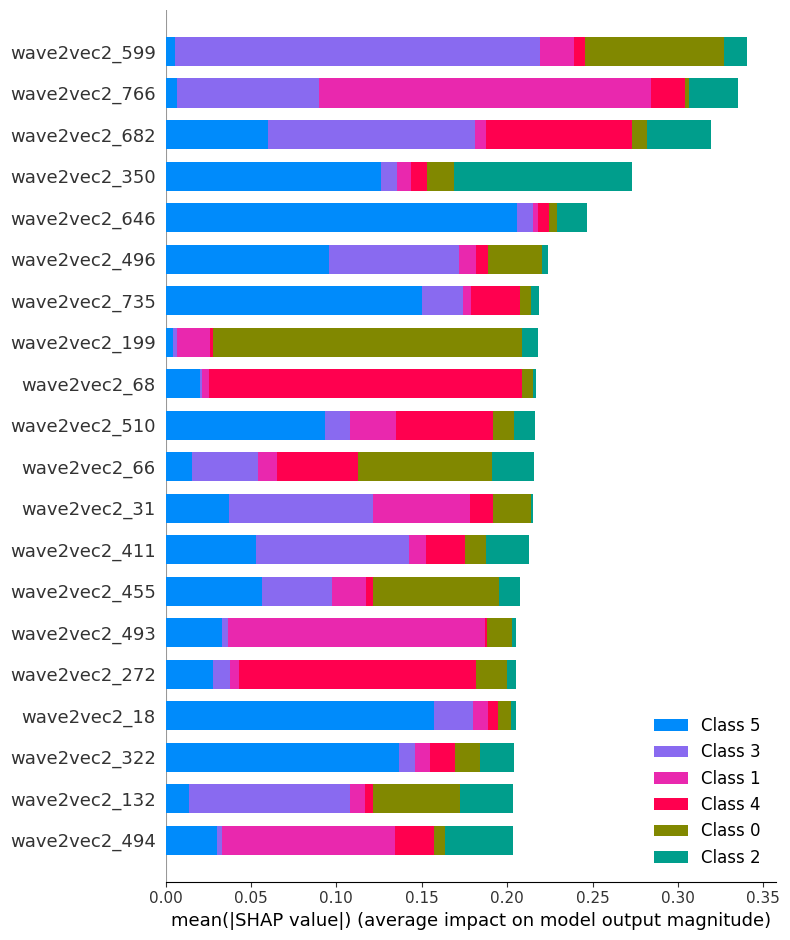

In [11]:
import shap

# Explain the model's predictions using SHAP by computing SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(train_feat_df)

#Convert the shap values for each class to a single list
shap_as_list=[]
for i in range(6):
    shap_as_list.append(shap_values[:,:,i])

# Plot the SHAP values
shap.summary_plot(shap_as_list, train_feat_df, plot_type="bar")